#Analyzing Opioid Transactions in Ohio

## 1.Introduction

### 1.1 Background

Our dataset contains transaction information on hundreds of thousands of recorded opioid sales in the United States from 2006-2012. Our data comes from the DEA's ARCOS Dataset, which kept record of all opioid transactions to pharmacies in every state for these 7 years. Our dataset does not contain any data on individual buyers, but rather contains data about where the transaction occurred, when, what was sold, and how much was sold to each retailer. Combining this data from ARCOS with Census data for Ohio counties, such as average age and average income, can give us an idea of what company targeted what area, or what demographic.

### 1.2 Problem

Excessive prescription of opioid medication is the most direct cause of the opioid epidemic. By using the data available to us by ARCOS, we can find what companies contributed the most to creating this nationwide epidemic. We can deduce what companies sold the most in what county using the ARCOS dataset, and find what places have been most impacted by the opioid epidemic.

### 1.3 Interests

Since the opioid epidemic is such a widespread issue throughout the United States, even today, this is information the public needs to see and understand. Anyone effected by the opioid epidemic should investigate the full extent of the dangerous excessive prescription by these companies in both Ohio cities and the United States as a whole. Since Ohio is the state with the second most drug related overdose deaths, Ohioans specifically would be interested in learning what companies are to blame, and where they have targeted.

## 2. Data Cleaning and Acquisition

## 2.1 Data Sources

The data obtained for this project comes from the ARCOS dataset, provided by the Washington Post. This dataset contains transaction data on all opioid sales to pharmacies in the United States, but there is some data necessary to change and add before analyzing this data. For example, the date format of the dataset provided by The Washington Post was formatted in integer form. This was changed to datetime format instead. Using datetime format instead of integer format for dates allows us to better sort data by different periods, including year or month transactions occurred. 

Data was also obtained from the United States census website. Data was gathered to find the population of each county in Ohio and per capita income in each county in Ohio.


## 2.2 Data Cleaning

The dataset also was missing some key information about the locations the transaction data was coming from. While the transaction data from ARCOS does include the county, city, and state the transactions originate from, ARCOS did not include any information about these locations. Data was taken from the United States Census website to fill in the gaps where information was lacking. From the Census website, per-capita county income was added to the dataset, as well as population by county. These values were added on to the existing database by using the population of each state county and the per-capita income of each county each year in the ARCOS dataset. We found the averages for these years in each county and used them to give more background about the situations these people and places are involved in that contribute to their high or low opioid transaction rate.

Using number of transactions or total quantity of pills sold to determine the gravity of pills sold in each area is also not an entirely accurate representation of volume of opioid transaction by population. Places with a low amount of opioid transactions that have a low population may be misrepresented as not being a significant area for opioid transactions. To solve this issue, total sales per capita was calculated by dividing total transactions by total population. Using sales per capita allows us to see if the amount of opioid transactions was high or low in a county regardless of the size of the population.

## 2.3 Feature Selection

There were many features included in the original ARCOS database that are not helpful in categorizing and exploring the transactions available to us. The dataset came with suggestions for interesting columns to use. All columns were removed except the columns specified by the suggestions for the dataset. The columns that were used by us include Buyer Name, Buyer Address, Buyer City, Buyer State, Buyer Zip, Buyer County, Drug Name, Quantity, Unit, Transaction Date, Base Weight In Grams, Product Name, Ingredient Name, Company Name, and Reporter Family.

The features that were kept and used by us in our exploration are Buyer State, Buyer County, Drug Name, Transaction Date, Base Weight in Grams, Product Name, and Company Name. Additional columns that were created include number of Transactions, County Population, County Per Capita Income, Transactions Per Capita, Pills Per Transaction, and Total Weight.

## Exploratory Data Analysis

## 3.1 Top Sales By Pharmaceutical Company

In [0]:
#@title
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import plotly.figure_factory as ff
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly==4.1.0

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#@title
test= pd.read_csv('drive/My Drive/arcos-oh-statewide-itemized.tsv.gz', sep='\t', error_bad_lines = False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3,5,22,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
#@title
simpleOhio = test[['BUYER_NAME','BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE', 'BUYER_ZIP', 'BUYER_COUNTY','DRUG_NAME', 'QUANTITY', 'UNIT', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM', 'DOSAGE_UNIT', 'Product_Name', 'Ingredient_Name','Revised_Company_Name', 'Reporter_family']]

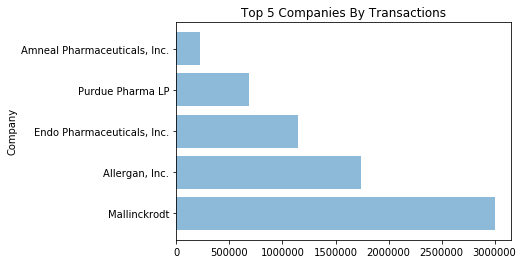

In [0]:
#@title
ohioCompanies = simpleOhio.groupby('Revised_Company_Name')
topOhioCompanies = ohioCompanies.size().sort_values(ascending = False)

countByCompany = simpleOhio.groupby('Revised_Company_Name').size().reset_index(name = 'counts')
companiesSorted = countByCompany.sort_values(by = ['counts'], ascending= False)
top5 = companiesSorted[:5]

#Change date format
simpleOhio['DATE'] = pd.to_datetime(simpleOhio.loc[:, ('TRANSACTION_DATE')].astype(str), format = '%m%d%Y')

objects = top5.Revised_Company_Name
y_pos = np.arange(len(objects))
values = top5.counts
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Company')
plt.title('Top 5 Companies By Transactions')

plt.show()

By grouping transaction data by company name, we can see what pharmaceutical companies are responsible for which transactions in Ohio. There are 66 total companies that contribute to the roughly nine million total transactions in Ohio over these years. The majority of these transactions come from a small amount of companies. The top five corporations responsible for sale of these opioids represented by ARCOS are responsible for nearly seven million of the transactions out of the roughly nine million total. These companies, in order from most transactions to least, are Mallinckrodt, Allergan, Inc., Endo Pharmaceuticals, Purdue Pharma, and Amneal Pharmaceuticals. The opioid crisis, as we have discovered, was mostly contributed to by a few billion dollar corporations that sold millions of pills over this time period. These numbers represent sales through seven years in Ohio.



## 3.2 Comparing Total Transactions and Total Pills Sold

By comparing total transactions in each county and total pills sold in each county, we can get a better sense of how large transactions are. We can see if counties with a high amount of transactions generally have high amounts of transactions with small amounts of pills in each transaction, or if they generally have transactions that are higher in size but a low total transaction count overall. We can show these sort of comparisons by plotting total transactions per county by total pills sold. This allows us to more easily see the size of transactions in each county. We can also plot how many pills per transaction each county has had over time in Ohio using the data in ARCOS.  

In [0]:
#@title
ohioCounty = simpleOhio.groupby('BUYER_COUNTY')
countyCounts = ohioCounty.count()

countyNames = simpleOhio.loc[:, 'BUYER_COUNTY'].unique()
countyDF = pd.DataFrame({'COUNTY_NAME': countyNames[:]})
countyDF = countyDF.sort_values(by=['COUNTY_NAME'])
countyDF = countyDF.reset_index(drop=True)
clustering = countyDF.drop(countyDF.index[88])
clustering = clustering.reset_index(drop=True)

countyCounts = countyCounts.reset_index()
transactionsPerCounty = countyCounts['BUYER_NAME']

clustering['numTransactions'] = transactionsPerCounty

sumByCounty = ohioCounty.sum()
sumByCounty = sumByCounty.reset_index()
quantityByCounty = sumByCounty['QUANTITY']
clustering['totalPills'] = quantityByCounty

censusData = pd.ExcelFile('drive/My Drive/co-est00int-01-39.xls')
censusData.sheet_names
df = censusData.parse('CO-EST00INT-01-39')
df.columns = df.loc[0]
df = df.drop(df.index[0])
df.reset_index(drop = True, inplace= True)
#Get average county population for timeframe of ARCOS
df.columns = ['County','gone','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
census = df.drop(['gone','2000','2001','2002','2003','2004','2005','2010','2011'], axis=1)
censusOhio = census.drop(census.index[0])
censusOhio.reset_index(drop = True, inplace = True)
countyPop = censusOhio.loc[:, "2006":"2009"]
censusOhio['countyPop'] = countyPop.mean(axis=1)
censusOhio = censusOhio.dropna()
censusOhio['countyPop'] = censusOhio['countyPop'].astype(int)

clustering['PopByCounty'] = censusOhio.countyPop

In [0]:
#@title
countyIncome = pd.read_excel('drive/My Drive/PerCapitaOhioCountyIncome.xlsx', sheet_name = 'Sheet1')
clustering['perCapIncome'] = countyIncome['header']

In [0]:
#@title
clustering['transactionsPerCapita'] = clustering['numTransactions'] / clustering['PopByCounty']

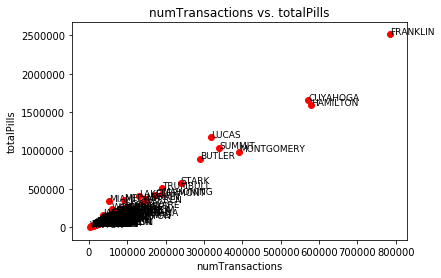

In [0]:
#@title
import matplotlib.pyplot as plt
types = clustering['COUNTY_NAME']

# simulating a pandas df['type'] column

x_coords = clustering['numTransactions']
y_coords = clustering['totalPills']

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.title('numTransactions vs. totalPills')
plt.xlabel('numTransactions')
plt.ylabel('totalPills')
plt.show() 
plt.show()

The above graph is a simple scatter plot showing correlation between total transactions and total pills in each county. This data will be explored further by performing regression analysis, but at first glance we can see that it appears as total transactions increase, total pills increase as well. This would point to transaction size being consistent even in counties with more transactions. We see there are outliers in the data, as counties including Franklin, Cuyahoga, and Hamilton are separated from the bulk of the grouped data due to their extremely high transaction count and total pill count.

In [0]:
#@title
clustering['pillsPerTransaction'] = clustering['totalPills'] / clustering['numTransactions']

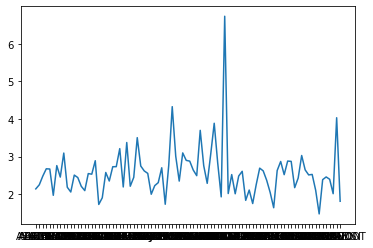

In [0]:
#@title
plt.plot( 'COUNTY_NAME', 'pillsPerTransaction', data=clustering )
plt.show()

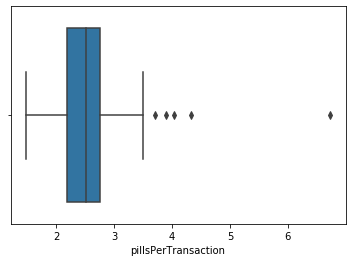

In [0]:
#@title
import seaborn as sns
ax = sns.boxplot(x=clustering["pillsPerTransaction"])


The graphs above show the average amount of pills in each transaction for each county in Ohio. The values show average quantity for each county in alphabetical order in the line graph, and the box plot shows distribution of total pills across each county. You can see from this graph that the average amount of pills sold is roughly 2-3 in Ohio. Miami county is the outlier in this dataset, where the highest peak is located. This county dealt 350,000 total pills in only approximately 51,000 transactions. At almost 7 pills per transaction, this is the county with the largest transactions. This is not the most accurate method to use to calculate true volume of transactions in each county. Counties with a greater volume of medication sold can be better determined by using weight of the pills in grams.

In [0]:
#@title
clustering.sort_values(by = 'pillsPerTransaction', ascending = False)[:5]

,COUNTY_NAME,numTransactions,totalPills,PopByCounty,perCapIncome,transactionsPerCapita,pillsPerTransaction
54,MIAMI,51458,346552.0,102278,25006,0.503119,6.734657
39,JACKSON,36537,158112.0,33139,18775,1.102538,4.327449
86,WOOD,60038,242105.0,125242,26671,0.479376,4.032529
51,MEDINA,91200,354354.0,169522,29986,0.537983,3.885461
47,LUCAS,319219,1180055.0,444690,23981,0.717846,3.696694


Above are the top five counties by pills per transaction. We can also use this data to compare if there is a correlation between total transactions and pills per transaction in these top five counties. We can see if the counties with the most sales are also the counties with the largest sales. Pills per transaction is one way to measure the overall volume of pills by location, but by calculating volume of pills by weight for each transaction, we can get a true sense of just how much medication has been sold in each place. 

In [0]:
#@title
byPPT = clustering.sort_values(by=['pillsPerTransaction'], ascending = False)
top5PPT = byPPT[:5]

countySums = ohioCounty.sum()
countyWeights = countySums['CALC_BASE_WT_IN_GM']

countyWeights.index = clustering.index

clustering['totalWeight'] = countyWeights


## 3.3 Determining Transaction Size by Total Weight

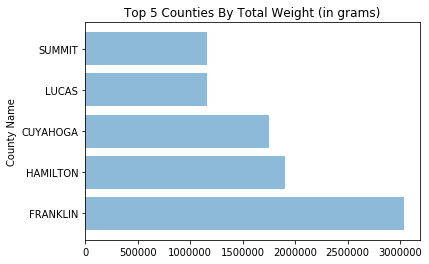

In [0]:
#@title
byTotalWeight = clustering.sort_values(by=['totalWeight'], ascending = False)
top5ByTotalWeight = byTotalWeight[:5]
top5TWRounded = top5ByTotalWeight.round(0)
objects = top5TWRounded.COUNTY_NAME
y_pos = np.arange(len(objects))
values = top5TWRounded.totalWeight
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('County Name')
plt.title('Top 5 Counties By Total Weight (in grams)')

plt.show()

Using total weight is another way we can determine transaction size. Total weight takes into account the weight of all pills sold combined, represented in total grams. The top counties represented in the graph above are those that have had the greatest total volume of pills sold there. These five counties are some of the most effected by the opioid epidemic in Ohio by total amount of medication sold. This is another way we can determine what counties have been hurt the most by overprescription of opioid medication, but it may not accurately represent how much smaller counties have been effected. Calculating transactions per capita is one way to determine what smaller counties have have the most transactions when taking into account county population.

## 3.4 Determining Drug Type Sold

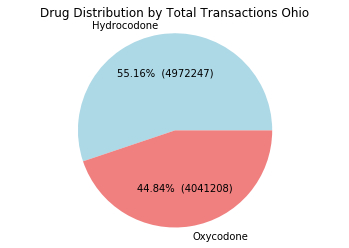

In [0]:
#@title
drugDist = simpleOhio.groupby('DRUG_NAME')
hydro = drugDist.count()['BUYER_NAME'][0]
oxy = drugDist.count()['BUYER_NAME'][1]

#Charts for total drug distribution Ohio
labels = 'Hydrocodone','Oxycodone'
sizes = hydro, oxy
colors = ['lightblue', 'lightcoral']



def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
plt.pie(sizes, labels = labels, colors = colors, autopct=make_autopct(values))
plt.axis('equal')
plt.title("Drug Distribution by Total Transactions Ohio")
plt.show()

Above is another basic visualization created using the library Matplotlib showing the distribution of total transactions including each drug type in Ohio over all years the ARCOS database covers. We can get a better understanding of just how many opioids have been purchased in each county by calculating how much of each medication is included in all transactions in a state or county, both by number of transactions and by total weight.

We can see that hydrocodone is the more prominent drug distributed in these transactions in Ohio. Hydrocodone is a medication used to treat severe pain of prolonged duration. This drug is often misused and contributes to the opioid crisis. Oxycodone is the other drug represented in this dataset, and is a drug with high risk for addiction and dependence. This information was not given by pharmaceutical companies when the prescription of this drug was pushed for by these companies. We can see that oxycodone is less prominent than hydrocodone, but still accounts for nearly half of the transactions in the data. Taking oxycodone can cause respiratory distress and death, especially in high doses or when combined with other substances, especially alcohol. These opioids are highly dangerous, and such high volumes of them being sold during these years contributed to many Ohioans becoming addicting and many also overdosing and dying. There were 4,293 deaths reported in 2017 in Ohio, the second highest of any state. Millions of prescriptions including drugs with hydrocodone or oxycodone were a cause for these addicted individuals and numerous deaths.


##  3.5 Using Transactions Per Capita To Determine Transaction Size

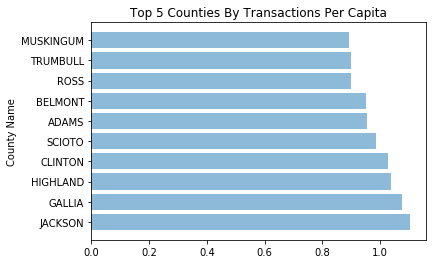

In [0]:
#@title
#plot by Transactions Per Capita
byTPC = clustering.sort_values(by=['transactionsPerCapita'], ascending = False)
top10ByTPC = byTPC[:10]

objects = top10ByTPC.COUNTY_NAME
y_pos = np.arange(len(objects))
values = top10ByTPC.transactionsPerCapita
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('County Name')
plt.title('Top 5 Counties By Transactions Per Capita')

plt.show()

Transactions per capita can be used to determine transaction size as well. This method of displaying volume of drug sales takes into consideration the size of a county when determining the volume of sales in comparison to other counties. Ten counties were displayed in the graph above, since no counties high on this list appeared in previous measurements of transaction volume. Counties with greater than 1.0 transactions per capita have more sales in the county than there are people. These counties are those that are greatly effected by the opioid epidemic, but have a low population count that prevents them from being shown as a county with many transactions.

## 3.6 Using Total Transactions to Determine Transaction Size

In [0]:
#@title
# Fips code for each county -- used in plotly
FIPS = ['39001','39003', '39005', '39007', '39009', '39011', '39013', '39015','39017', '39019', '39021', '39023', '39025', '39027', '39029', '39031', '39033', '39035', '39037', '39039', '39041', \
        '39043', '39045', '39047', '39049', '39051', '39053', '39055', '39057', '39059', '39061', '39063', '39065', '39067', '39069', '39071', '39073', '39075', '39077', '39079', '39081',\
        '39083', '39085', '39087', '39089', '39091', '39093', '39095', '39097', '39099', '39101', '39103', '39105', '39107', '39109', '39111', '39113', '39115', '39117', '39119', '39121',\
        '39123', '39125', '39127', '39129', '39131', '39133', '39135', '39137', '39139', '39141', '39143', '39145', '39147', '39149', '39151', '39153', '39155', '39157', '39159', '39161', \
        '39163', '39165', '39167', '39169', '39171', '39173', '39175']


#plotly heat map -- transactions by county

countByCounty = simpleOhio.groupby('BUYER_COUNTY').size().reset_index(name = 'counts')
countByCounty

values = countByCounty['counts'].tolist()
fig = ff.create_choropleth(fips=FIPS, values=values, scope = ['OH'], legend_title = 'Number of Transactions', title = 'Total Opioid Transactions in Ohio', county_outline={'color': 'rgb(255,255,255)', 'width': 0.5})
fig.layout.template = None

fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
#@title
top5Pops = []

frankPop = clustering[clustering['COUNTY_NAME'] == 'FRANKLIN']
top5Pops.append(frankPop['PopByCounty'].values)

hamPop = clustering[clustering['COUNTY_NAME'] == 'HAMILTON']
top5Pops.append(hamPop['PopByCounty'].values)

cuyPop = clustering[clustering['COUNTY_NAME'] == 'CUYAHOGA']
top5Pops.append(cuyPop['PopByCounty'].values)

montPop = clustering[clustering['COUNTY_NAME'] == 'MONTGOMERY']
top5Pops.append(montPop['PopByCounty'].values)

summitPop = clustering[clustering['COUNTY_NAME'] == 'SUMMIT']
top5Pops.append(summitPop['PopByCounty'].values)

countByCounty = simpleOhio.groupby('BUYER_COUNTY').size().reset_index(name = 'counts')
top5ByTransaction = countByCounty.sort_values(by = 'counts', ascending = False)
top5ByTransaction.reset_index()
top5ByTransaction = top5ByTransaction[:5]
top5ByTransaction['pop'] = top5Pops
top5ByTransaction



,BUYER_COUNTY,counts,pop
24,FRANKLIN,784051,[1134922]
30,HAMILTON,578019,[802179]
17,CUYAHOGA,572388,[1297729]
56,MONTGOMERY,391859,[539311]
76,SUMMIT,339740,[543546]


By using overall number of transactions to determine volume of pills sold, we can see what counties had the most total transactions during the time represented in the ARCOS dataset. From this heatmap above and the coinciding list, showing the top 5 Ohio counties when transactions are used to determine volume of pill sales, we concluded that this list is a fairly accurate representation of which counties are most effected by the opioid epidemic. The top 5 counties in this list is almost identical to the one produced when using weight as a metric to determine volume of medication sales, with the exception of Summit county being included in the top 5 of total transactions, while Lucas is included in total weight. These are a more accurate representation of larger counties again, as counties with small population fall lower on this list.

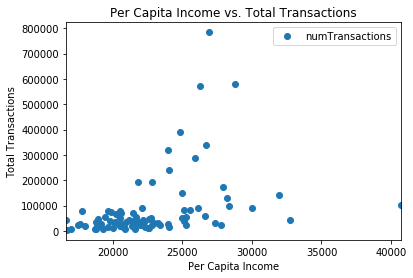

In [0]:
#@title
clustering.plot(x='perCapIncome', y='numTransactions', style='o')
plt.title('Per Capita Income vs. Total Transactions')
plt.xlabel('Per Capita Income')
plt.ylabel('Total Transactions')
plt.show()  


This graph compares per capita income and total transactions. From this graph, we can see that most Ohio counties have a low per capita income. Counties with very low per capita income also tend to have few total opioid transactions. The counties with the most transactions are on the higher end of Ohio per capita income. Counties with the highest per capita income have very few opioid transactions. Perhaps low to medium income areas are the areas pharmaceutical companies target based on this graph using total transactions.

## 3.7 Comparing Transactions Per Capita and Total Transactions

In [0]:
#@title
val =  clustering['transactionsPerCapita'].tolist()
myList = list(np.around(np.array(val),2))
values = myList
fig = ff.create_choropleth(fips=FIPS, values=values, scope = ['OH'], legend_title = 'Transactons Per Capita', title = 'Transactions Per Capita', county_outline={'color': 'rgb(255,255,255)', 'width': 0.5})
fig.layout.template = None

fig.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
#@title 
clusteringByTPC = clustering.sort_values(by = 'transactionsPerCapita', ascending = False)
clusteringByTPCTop5 = clusteringByTPC[:5]
graphTPC = clusteringByTPCTop5[['COUNTY_NAME', 'PopByCounty','transactionsPerCapita']]
graphTPC

,COUNTY_NAME,PopByCounty,transactionsPerCapita
39,JACKSON,33139,1.102538
26,GALLIA,30939,1.073629
35,HIGHLAND,43671,1.036317
13,CLINTON,42537,1.026212
72,SCIOTO,78858,0.985024


By comparing the maps and graphs for both total transactions and transactions per capita, we can see the differences between data when we change the parameters we sort by. The top five counties when sorting by total transactions are different than the top five when sorting by transactions per capita. Transactions per capita includes five counties that are relatively low in population in comparison to the top five counties when sorting by total transactions. Transactions per capita is a measure of how many transactions there are per how many people live in that county, allowing smaller counties to appear in the top five on the list for transactions per capita. Transactions per capita may be a better measure of total influence of the opioid epidemic than total transactions as it includes smaller counties that are not high on the list of counties with the most transactions. These smaller counties are some of the worst effected by the opioid epidemic, as in some counties transactions per capita is more than one, meaning there are more transactions than people.

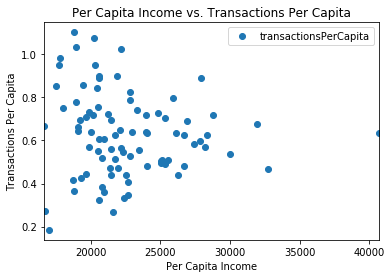

In [0]:
#@title
clustering.plot(x='perCapIncome', y='transactionsPerCapita', style='o')
plt.title('Per Capita Income vs. Transactions Per Capita')
plt.xlabel('Per Capita Income')
plt.ylabel('Transactions Per Capita')
plt.show() 

The above graph depicts per capita income graphed against transactions per capita. This graph is meant to contrast the similar scatter plot using total transactions. On this plot, we are able to tell again that most Ohio counties have a low per capita income. However, this plot clearly shows the counties with the lowest per capita income have the highest transactions per capita. The counties with more transactions than people living there are some of the poorest in Ohio. This supports our hypothesis that counties with a lower per capita income would be effected by the opioid epidemic the most. Transactions per capita may be the best measure of overall effects of the opioid epidemic, as it does not skew data based on population of counties. As per capita income increases, generally, transactions per capita decrease.

## 3.8 Comparing Total Transactions, Pills Per Transaction, Transactions Per Capita, and Total Weight

Using total transactions and total weight of all sales in counties are good metrics to use to determine which large counties are most effected by the opioid epidemic. These metrics determine which counties have the most overall volume of medication sold. Counties with larger population have larger amounts of pills sold, as determined by the plot depicting pills per transaction. It is therefore more effective to use total transactions and total weight to determine which larger states have been most effected, since they are similar in population size. By using transactions per capita to determine volume of sales, we can see what smaller counties have been most effected by the opioid epidemic during the years represented in ARCOS. Calculating how many transactions occur for every person living in a county is a better representation of how much counties with a small population have been sold to. Counties with small populations have been effected just as greatly as large counties, and some counties in Ohio have more transactions than citizens living in the county. Using all four of these metrics is necessary to determine how great the volume of medication sold truly is in each place. Without using more than one of these methods, smaller counties or larger counties would appear to be effected less than they actually are.

## 3.9 Examining Unique Companies by County

In [0]:
#@title
import statistics
uniqueCompanies = simpleOhio.groupby('BUYER_COUNTY')['Revised_Company_Name'].nunique()
clustering['uniqueCompanies'] = uniqueCompanies.reset_index(drop = True)
uniqueCompaniesSorted = clustering.sort_values(by = 'uniqueCompanies')

print('Mean per-capita income for counties in bottom half of unique companies is:',round(statistics.mean(uniqueCompaniesSorted[:44]['perCapIncome'])))
print('Mean per-capita income for counties in top half of unique companies is:',round(statistics.mean(uniqueCompaniesSorted[45:]['perCapIncome'])))

print('Mean population for counties in bottom half of unique companies is:',round(statistics.mean(uniqueCompaniesSorted[:44]['PopByCounty'])))
print('Mean population for counties in top half of unique companies is:',round(statistics.mean(uniqueCompaniesSorted[45:]['PopByCounty'])))
uniqueCompaniesSorted.tail()

Mean per-capita income for counties in bottom half of unique companies is: 21020
Mean per-capita income for counties in top half of unique companies is: 24331
Mean population for counties in bottom half of unique companies is: 40088
Mean population for counties in top half of unique companies is: 225024


,COUNTY_NAME,numTransactions,totalPills,PopByCounty,perCapIncome,transactionsPerCapita,pillsPerTransaction,totalWeight,uniqueCompanies
76,SUMMIT,339740,1028452.0,543546,26676,0.625044,3.027174,1.156381e+06,42
17,CUYAHOGA,572388,1653160.0,1297729,26263,0.441069,2.888181,1.751051e+06,44
30,HAMILTON,578019,1588200.0,802179,28799,0.720561,2.747661,1.906341e+06,47
56,MONTGOMERY,391859,987011.0,539311,24828,0.726592,2.518791,1.055533e+06,48
24,FRANKLIN,784051,2516470.0,1134922,26909,0.690841,3.209574,3.038615e+06,48


Unique companies represents the amount of unique pharmaceutical companies that have at least one transaction in a county. Above are the top 5 counties when sorting by unique company. These are some of the same counties that have appeared when sorting by transactions and by weight. These are some of the counties with the most transactions, and therefore are some of the Ohio counties that the opioid epidemic has touched the most. Mean per capita income is actually lower in counties with fewer unique companies. However, counties with the most unique companies have a much higher population, at 225,024 compared to 40,088. Perhaps pharmaceutical companies look to target higher income, highly populated areas.

## 3.10 Mallinckrodt Sales

In [0]:
#@title
mallinckrodt = simpleOhio[simpleOhio['Revised_Company_Name'] == 'Mallinckrodt']
mallByCounty = mallinckrodt.groupby('BUYER_COUNTY').count()
malCounts = mallByCounty['BUYER_NAME'].tolist()
clustering['MallinckrodtSales'] = malCounts
clustering.sort_values(by = 'MallinckrodtSales', ascending= False)[:5]

,COUNTY_NAME,numTransactions,totalPills,PopByCounty,perCapIncome,transactionsPerCapita,pillsPerTransaction,totalWeight,uniqueCompanies,MallinckrodtSales
24,FRANKLIN,784051,2516470.0,1134922,26909,0.690841,3.209574,3.038615e+06,48,302662
30,HAMILTON,578019,1588200.0,802179,28799,0.720561,2.747661,1.906341e+06,47,222922
17,CUYAHOGA,572388,1653160.0,1297729,26263,0.441069,2.888181,1.751051e+06,44,214144
56,MONTGOMERY,391859,987011.0,539311,24828,0.726592,2.518791,1.055533e+06,48,162278
47,LUCAS,319219,1180055.0,444690,23981,0.717846,3.696694,1.161067e+06,40,134046


In [0]:
#@title
print('Mallinckrodt Total Sales : ',clustering['MallinckrodtSales'].sum())

Mallinckrodt Total Sales :  3006764


A column was also added to the produced dataframe containing values for the number of total transactions completed by the pharmaceutical company Mallinckrodt, the company in the ARCOS dataframe with the most transactions in Ohio. This company is responsible for over three million transactions in Ohio alone during the years covered by the ARCOS dataset. Showing the total number of transactions by this company in each county allows us to see how the top company making sales of opioids has effected each county in Ohio. Mallinckrodt seems to have the most transactions in counties with the most transactions. These are some of the biggest counties with the most opioid transactions. This data will also be used in clustering analysis to try to get a sense of what groups Mallinckrodt targeted to make the most sales.

## 4. Predictive Modeling / Unsupervised Learning

## 4.1 Linear Regression

In an attempt to prove that total transactions and total pills are correlated, a model was created to show linear regression. Data was plotted using total transactions versus total pills. Regression was conducted using the library scikit-learn, excluding outliers from the similar scatter plot in 3.2. Using regression can prove the relationship between total transactions and total pills. These outliers included counties with highly above average total transactions (above 100,000) or highly above average total pills (greater than 150,000). Using a graph that does not include outliers allows us to see trends in the data where it is gathered the closest, as using outliers, including Frankling, Hamilton, and Cuyahoga counties, would skew data.

In [0]:
#@title
transSizeSet = clustering[clustering.numTransactions < 100000]
transactionSizeSet = transSizeSet[transSizeSet.totalPills < 150000]

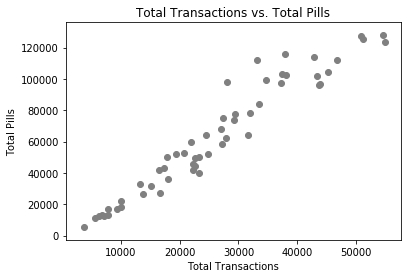

In [0]:
#@title
import matplotlib.pyplot as plt
types = transactionSizeSet['COUNTY_NAME']

x_coords = transactionSizeSet['numTransactions'].tolist()
y_coords = transactionSizeSet['totalPills'].tolist()

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='grey')
plt.title('Total Transactions vs. Total Pills')
plt.xlabel('Total Transactions')
plt.ylabel('Total Pills')
plt.show()

In [0]:
#@title
X = transactionSizeSet['numTransactions'].values.reshape(-1,1)
Y = transactionSizeSet['totalPills'].values

In [0]:
#@title
regressor = LinearRegression()  
#regressor.fit(X_train, y_train)
model = regressor.fit(X, Y)

print('slope is:', regressor.coef_)

r_sq = model.score(X,Y)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X)

slope is: [2.56718415]
coefficient of determination: 0.9308590233719808


A slope of 2.56 means that for every 1 increase in total transactions, total pills increases by 2.56. Coefficient of determination is a measure of accuracy of the model, so a score near 0.93 is very accurate.

In [0]:
#@title
df = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': y_pred.flatten()})
df['Diff'] = (df['Actual'] - df['Predicted']).round(2)
df[:10]

,Actual,Predicted,Diff
0,58228.0,66178.136980,-7950.14
1,123304.0,137137.674019,-13833.67
2,42923.0,40734.774888,2188.23
3,114237.0,106221.075323,8015.92
4,44601.0,54476.911633,-9875.91
5,78391.0,78331.186737,59.81
6,17110.0,16400.436347,709.56
7,45884.0,53583.531549,-7699.53
8,96335.0,108336.435061,-12001.44
9,41791.0,38416.607602,3374.39


Above are the first ten actual versus predicted values using our simple regression model. We can see here that the model produced is not perfectly accurate, but does predict values that are close to the actual values provided. Below is a visualization showing the values of total transactions and total pills, with a line to show the predicted values using the model.

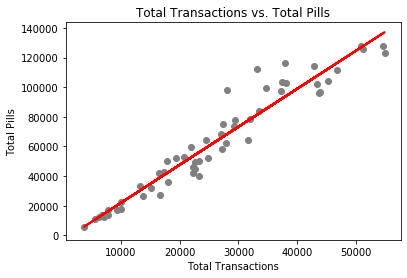

In [0]:
#@title
types = transactionSizeSet['COUNTY_NAME']

x_coords = transactionSizeSet['numTransactions'].tolist()
y_coords = transactionSizeSet['totalPills'].tolist()

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='grey')
    plt.title('Total Transactions vs. Total Pills')
plt.xlabel('Total Transactions')
plt.ylabel('Total Pills')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

Using regression can create a fairly accurate model that shows the correlation between total transactions and total pills. The above graph shows that as total transactions increase, total pills increases as well. This graph proves that total transactions and total pills are correlated. In the context of this project, this means that as counties get larger, transaction size gets larger as well.

## 4.2 Clustering Analysis

In [0]:
#@title
clustering = clustering.drop(['numTransactions', 'totalPills'], axis = 1)
clustering.head()




,COUNTY_NAME,PopByCounty,perCapIncome,transactionsPerCapita,pillsPerTransaction,totalWeight,uniqueCompanies,MallinckrodtSales
0,ADAMS,28584,17693,0.952631,2.138377,74959.319997,22,12683
1,ALLEN,106681,21713,0.514347,2.247162,130529.422363,33,22171
2,ASHLAND,53394,20558,0.324362,2.478376,40940.329147,23,7976
3,ASHTABULA,101976,19898,0.730260,2.673542,227053.055469,35,28865
4,ATHENS,64375,16642,0.665289,2.667344,142252.482611,28,18784


The columns 'numTransactions' and 'totalPills' were dropped from the clustering dataframe before the dataset was normalized. These columns are unnecessary to include with the addition of the columns 'transactionsPerCapita' and 'pillsPerTransaction' which better represent transactions per county and transaction size per county, respectively. Data was normalized using Sklearn StandardScaler to interpret features with different magnitutudes and distributions equally. 

In [0]:
#@title
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

X = clustering.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

clustering["Labels"] = labels
clusterStats = clustering.groupby('Labels').mean()
clusterStats.round(2)

,PopByCounty,perCapIncome,transactionsPerCapita,pillsPerTransaction,totalWeight,uniqueCompanies,MallinckrodtSales
Labels,,,,,,,
0,51377.25,21010.12,0.62,2.42,94741.85,25.51,14970.12
1,1078276.67,27323.67,0.62,2.95,2232002.52,46.33,246576.00
2,246605.20,27164.85,0.64,3.00,510795.09,37.20,64698.90


**Cluster 0 :**Low population, low income counties

**Cluster 1 :** High population, middle class income counties

**Cluster 2 :** Medium population, low to middle class income counties

Three clusters were formed from the clustering dataframe, shown above. This allowed us to see in what ways Ohio counties are similar or different from each other. Clusters differ by population, as cluster 0 contains counties with a very low population, cluster 1 contains counties with very high population, and cluster 0 contains counties with medium population size. Transactions per capita appear to be one of the biggest differences between the clusters. Cluster 0 has the lowest, cluster 1 slightly higher, and cluster 2 has the most transactions per capita. It is interesting that although cluster 1 has the largest population and the most pills by weight, cluster 2, a medium population cluster, has more transactions per capita. Cluster 1 also has the largest transactions, with the highest pillsPerTransaction of any cluster, but cluster 2 has similar transaction sizes. Another interesting insight given by this data is that cluster 2 has almost as many unique companies making sales there as cluster 1, which has a much higher average population. It appears most pharmacetical companies target medium income areas more than lower income areas,perhaps because higher income areas have a higher population and therefore more potential sales. Mallinckrodt, the pharmaceutical company with the most total sales, appears to follow the same trends as other companies, has the most average sales in cluster 1, perhaps because it has the highest population.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Text(0.5, 1, 'Per Capita Income Vs. Transactions Per Capita - Clustered')

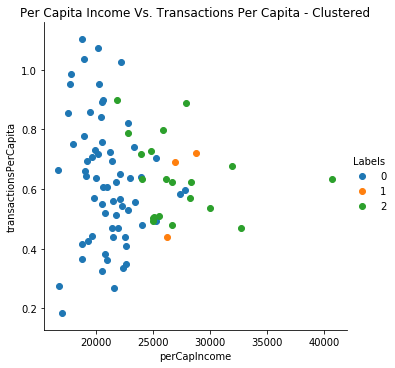

In [0]:
#@title
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.FacetGrid(clustering,hue='Labels',size=5)\
.map(plt.scatter,'perCapIncome','transactionsPerCapita')\
.add_legend()

plt.title('Per Capita Income Vs. Transactions Per Capita - Clustered')

Above is a scatter plot created using the Seaborn library showing data for each county when comparing per capita income and transactions per capita. Each point is labeled by the cluster calculated above. Here, we can visualize the difference between per capita income in each cluster, and how transactions per capita differ between counties as per capita income changes. We can see low income counties in cluster 0 have the lowest per capita income and low to medium amounts of sales. We can conclude from this that low income counties in cluster 2 have been effected the most by the opioid crisis, as this group contains all the counties with transactions per capita over 1.0. We can conclude that cluster 1 is the cluster of counties most effected by the opioid epidemic, but only in the counties in cluster 1 on the low end of average income. Cluster 1 appears to have a medium per capita income and medium amount of transactions per capita.

In [0]:
#@title
values = clustering['Labels'].tolist()
fig = ff.create_choropleth(fips=FIPS, values=values, scope = ['OH'], legend_title = 'Clusters', title = 'Clustering Analysis', county_outline={'color': 'rgb(255,255,255)', 'width': 0.5})
fig.layout.template = None

fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
#@title

cluster1 = clustering[clustering['Labels']== 1]
simpleClus1 = cluster1[['COUNTY_NAME','Labels']]



In [0]:
#@title
popClus1 = cluster1[['COUNTY_NAME','PopByCounty','Labels']]
popClus1.sort_values(by = 'PopByCounty', ascending = False)

,COUNTY_NAME,PopByCounty,Labels
17,CUYAHOGA,1297729,1
24,FRANKLIN,1134922,1
30,HAMILTON,802179,1


All counties in group 1, the smallest cluster, are shown above.

Above is a heatmap colored according to the clusters each county was grouped in using the Kmeans clustering algorithm. This allows us to more clearly see where counties located in the same cluster are located geographically, and if these places have any similar characteristics based on their location. Cluster 0, the cluster with the most counties, contains poorer, rural counties. Cluster 2 contains counties closer to urban areas. But what about cluster 1? We can see that there are only seven counties in cluster 1, and when sorting by population,we see that these counties are in their own cluster because they are the counties with major cities in Ohio. Cleveland, Columbus, and Cincinnati are major Ohio cities in Cuyahoga, Franklin, and Hamilton counties, respectively. These counties have the most transactions and are some of the highest population counties in Ohio, and are near the most urban Ohio areas.

We can now make better conclusions about the clusters formed from our Kmeans analysis. The groups created by the clustering analysis can be labeled as follows:

**Cluster 0 :** Rural, Low population, low income counties. Most of Ohio is rural, and most of these counties have similar characteristics, making this the largest cluster.

**Cluster 1 :** Counties with major Ohio cities (Cleveland, Columbus, Cincinnati, Toledo), High population, middle class income counties

**Cluster 2 :** Suburban, Medium population, Middle class income counties surrounding major urban areas

## 5. Conclusions

All counties in Ohio have been greatly effected by the opioid epidemic. Ohio has historically been one of the states with the most people addicted to opioid medications, and this is reflected in the ARCOS database. There do seem to be some places effected worse by the opioid epidemic than others, but the results differ slightly depending on how the data is assessed. The counties with the most total people effected by opioid medications are Franklin, Hamilton, and Cuyahoga counties, but as these are counties containing the cities Columbus, Cincinnati, and Cleveland, these are also the counties with the highest populations. When adjusting for population, using our calculated transactions per capita, we see that rural Ohio was most effected by the edpidemic, particularly southern Ohio. Most transactions in Ohio took place in rural, poor counties because of the amount of rural areas in Ohio, but major cities and the areas surrounding them account for the highest amount of concentrated sales. Many pharmaceutical companies are responsible for this epidemic, but the company Mallinckrodt in particular is the company responsible for the most transactions of any of the 67 unique companies recorded in ARCOS. Mallinckrodt made over three million total transactions in Ohio over the time ARCOS recorded out of the roughly nine million total transactions, most of which were recorded in major cities and surrounding areas. Using different techniques to determine volume of transactions per county is necessary because of the many differences in characteristics between urban and rural areas. Ohio in particular has major cities scattered throughout the state separated by many large, rural counties. The amount of rural space Ohio has and the concentration of people in the major cities in Ohio make it difficult to determine volume of transactions simply by the total amount of transactions in each place. Calculating new variables based on population, income, and transaction size allow us to get a better sense of how each county differs in effectedness by the opioid epidemic, even with the differences between them. 

## 6. Future Directions

Ohio is a large state by geographic area, but is dominated by dozens of poor, rural counties. There are some major cities in Ohio, but it would be interesting to explore the ARCOS dataset focusing on a state that is perhaps known to be one of the states with the fewest opioid transactions, or a state dominated by more urban areas. Using a state like Ohio to quantify the amount of opioids used by the entire United States would be inaccurate, as Ohio is the state with the second most drug related overdose deaths in the United States. It would also be interesting to explore all the transactions in the ARCOS database as a whole to find interesting trends in the data across all places in the United States.